<a href="https://colab.research.google.com/github/RaziehSh1987/3d_plot_Image_Mediapipe/blob/main/v14_mediapipe_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Pose Solution API in Python (see also http://solutions.mediapipe.dev/pose).

In [ ]:
# !pip install mediapipe

Upload any image that that has a person. We take two example images from the web: https://unsplash.com/photos/v4zceVZ5HK8 and https://unsplash.com/photos/e_rhazQLaSs.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 0010.jpg to 0010.jpg


0010.jpg


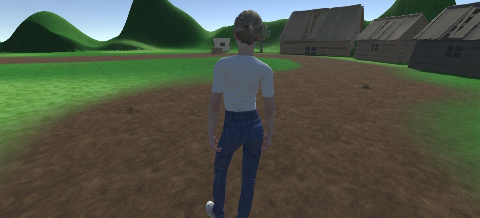

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
# /usr/local/lib/python3.8/dist-packages/mediapipe/python/solutions/drawing_utils.py
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

Nose coordinates: (658.7376041412354, 94.67533707618713)
Pose landmarks of 0010.jpg:


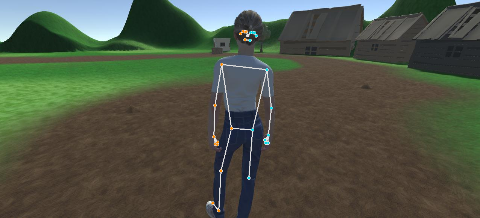

In [ ]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

In [ ]:
from mediapipe.framework.formats.landmark_pb2 import Landmark
# Run MediaPipe Pose and plot 3d pose world landmarks.
# /usr/local/lib/python3.8/dist-packages/mediapipe/python/solution_base.py
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:')
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    # mp_drawing.plot_landmarks(
    #     results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
# ----------------------
from typing import List, Mapping, Optional, Tuple, Union
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px



WHITE_COLOR = (224, 224, 224)
RED_COLOR = (0, 0, 255)
BLACK_COLOR = (0, 0, 0)
_PRESENCE_THRESHOLD = 0.5
_VISIBILITY_THRESHOLD = 0.5
_BGR_CHANNELS = 3


def _normalize_color(color):
  return tuple(v / 255. for v in color)
class DrawingSpec:
  # Color for drawing the annotation. Default to the white color.
  color: Tuple[int, int, int] = WHITE_COLOR
  # Thickness for drawing the annotation. Default to 2 pixels.
  thickness: int = 1
  # Circle radius. Default to 2 pixels.
  circle_radius: int = 1

  def  __init__(self,color,thickness):
    self.color=color
    self.thickness=thickness
    

DrawingSpec1 = DrawingSpec(color=RED_COLOR, thickness=2)
DrawingSpec2 = DrawingSpec(color=BLACK_COLOR, thickness=2)

connections=mp_pose.POSE_CONNECTIONS
landmark_list=results.pose_world_landmarks
landmark_drawing_spec= DrawingSpec1
connection_drawing_spec= DrawingSpec2
elevation: int = 10
azimuth: int = 10


land_x=[]
land_y=[]
land_z=[]

land_x_line=[]
land_y_line=[]
land_z_line=[]

if not landmark_list:
    print("It doesn't detect ")
# plt.figure(figsize=(10, 10))
# ax = plt.axes(projection='3d')
# ax.view_init(elev=elevation, azim=azimuth)
plotted_landmarks = {}
for idx, landmark in enumerate(landmark_list.landmark):
  if ((landmark.HasField('visibility') and
        landmark.visibility < _VISIBILITY_THRESHOLD) or
      (landmark.HasField('presence') and
        landmark.presence < _PRESENCE_THRESHOLD)):
    continue
  # ax.scatter3D(
  #     xs=[-landmark.z],
  #     ys=[landmark.x],
  #     zs=[-landmark.y],
  #     color=_normalize_color(landmark_drawing_spec.color[::-1]),
  #     linewidth=landmark_drawing_spec.thickness)
# -------- 
  land_x.append(-landmark.z)
  land_y.append(landmark.x)
  land_z.append(-landmark.y)


  plotted_landmarks[idx] = (-landmark.z, landmark.x, -landmark.y)
if connections:
  num_landmarks = len(landmark_list.landmark)
  # Draws the connections if the start and end landmarks are both visible.
  for connection in connections:
    start_idx = connection[0]
    end_idx = connection[1]
    if not (0 <= start_idx < num_landmarks and 0 <= end_idx < num_landmarks):
      raise ValueError(f'Landmark index is out of range. Invalid connection '
                        f'from landmark #{start_idx} to landmark #{end_idx}.')
    if start_idx in plotted_landmarks and end_idx in plotted_landmarks:
      landmark_pair = [
          plotted_landmarks[start_idx], plotted_landmarks[end_idx]
      ]
      # ax.plot3D(
      #     xs=[landmark_pair[0][0], landmark_pair[1][0]],
      #     ys=[landmark_pair[0][1], landmark_pair[1][1]],
      #     zs=[landmark_pair[0][2], landmark_pair[1][2]],
      #     color=_normalize_color(connection_drawing_spec.color[::-1]),
      #     linewidth=connection_drawing_spec.thickness)
      # print([landmark_pair[0][0], landmark_pair[1][0]])
      # print('----')
      land_x_line.append(landmark_pair[0][0])
      land_x_line.append( landmark_pair[1][0])
      land_x_line.append(None)
      land_y_line.append(landmark_pair[0][1])
      land_y_line.append( landmark_pair[1][1])
      land_y_line.append(None)
      land_z_line.append(landmark_pair[0][2])
      land_z_line.append( landmark_pair[1][2])
      land_z_line.append(None)
#  -----     # 
fig=go.Figure(go.Scatter3d(x=land_x,
                              y=land_y,
                              z=land_z,
                              mode='markers', 
                           marker = dict(
                           size=3,
                           color='red',
                           opacity=.9)))#,
                              # line_width=landmark_drawing_spec.thickness, 
                              # line_color=_normalize_color(landmark_drawing_spec.color[::-1])))

# print(land_x_line)
fig.update_layout(width=1000, height=1000)

go.Figure()
data = fig._data


# fig=go.Figure(
vector=go.Scatter3d(x=land_x_line,
                          y=land_y_line,
                          z=land_z_line,
                          mode='lines', 
                          line=dict(
                          color='blue' 
                          ),
                          line_width=connection_drawing_spec.thickness)
    # )#, 
data.append(vector)
                          # line_color=_normalize_color(connection_drawing_spec.color[::-1])))
fig.update_layout(width=500, height=500)




# plt.show()



Nose world landmark:
x: 0.033013202250003815
y: -0.6337506771087646
z: 0.021673625335097313
visibility: 0.9999475479125977



Pose segmentation of 0010.jpg:


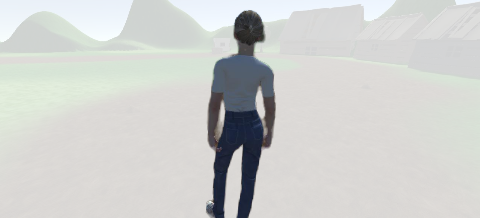

In [ ]:
# Run MediaPipe Pose with `enable_segmentation=True` to get pose segmentation.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, 
    model_complexity=2, enable_segmentation=True) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw pose segmentation.
    print(f'Pose segmentation of {name}:')
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
    resize_and_show(annotated_image)